# Directional Wells Trayectories - Visualization

# Import Python Libraries

In [1]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
Well_file = "Data/input/F-15/1.xml"
with open(Well_file) as file:
    data = file.read()

# Data Processing

In [4]:
data_xml = BeautifulSoup(data, 'html.parser')

In [11]:
incl = data_xml.find_all("incl")
incl[3].text

'0.00488692192665297'

In [12]:
params = []
for tag in data_xml.find_all():
    params.append(str(tag.name))

In [13]:
params = set(params)
params

{'azi',
 'aziref',
 'azivertsect',
 'commondata',
 'dispew',
 'dispewvertsectorig',
 'dispns',
 'dispnsvertsectorig',
 'dls',
 'dtimcreation',
 'dtimlastchange',
 'dtimstn',
 'dtimtrajend',
 'dtimtrajstart',
 'gridcorused',
 'incl',
 'itemstate',
 'magdeclused',
 'md',
 'mddelta',
 'mdmn',
 'mdmx',
 'name',
 'namewell',
 'namewellbore',
 'priv_customdata',
 'priv_dtimreceived',
 'priv_iplastchange',
 'priv_ipowner',
 'priv_userlastchange',
 'priv_userowner',
 'ratebuild',
 'rateturn',
 'servicecompany',
 'sourcename',
 'statustrajstation',
 'trajectory',
 'trajectorys',
 'trajectorystation',
 'tvd',
 'tvddelta',
 'typesurveytool',
 'typetrajstation',
 'vertsect'}

In [15]:
params = set([str(tag.name) for tag in data_xml.find_all()])
params

{'azi',
 'aziref',
 'azivertsect',
 'commondata',
 'dispew',
 'dispewvertsectorig',
 'dispns',
 'dispnsvertsectorig',
 'dls',
 'dtimcreation',
 'dtimlastchange',
 'dtimstn',
 'dtimtrajend',
 'dtimtrajstart',
 'gridcorused',
 'incl',
 'itemstate',
 'magdeclused',
 'md',
 'mddelta',
 'mdmn',
 'mdmx',
 'name',
 'namewell',
 'namewellbore',
 'priv_customdata',
 'priv_dtimreceived',
 'priv_iplastchange',
 'priv_ipowner',
 'priv_userlastchange',
 'priv_userowner',
 'ratebuild',
 'rateturn',
 'servicecompany',
 'sourcename',
 'statustrajstation',
 'trajectory',
 'trajectorys',
 'trajectorystation',
 'tvd',
 'tvddelta',
 'typesurveytool',
 'typetrajstation',
 'vertsect'}

In [19]:
tvd = data_xml.find_all("tvd")
float(tvd[2].text)

153.399985329122

In [20]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
df = pd.DataFrame()
for col in columns:
    df[col] = [float(x.text) for x in data_xml.find_all(col)]      

In [25]:
df.head()

,azi,incl,md,tvd,dispns,dispew
0,0.000000,0.000000,0.000000,0.000000,-3.170000,3.530000
1,0.000000,0.000000,145.899994,145.899994,-3.170000,3.530000
2,4.427726,0.002618,153.399994,153.399985,-3.172757,3.520578
3,2.548530,0.004887,234.199997,234.199627,-3.366177,3.529412
4,2.377313,0.013614,274.600006,274.597786,-3.646544,3.774881


In [37]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/input/"
suffix = "/1.xml"

df_all_wells = pd.DataFrame()
for well in wells:
    df = pd.DataFrame()
    WITSML_file = preffix + well + suffix
    with open(WITSML_file) as f:
        data = f.read()
    data_xml = BeautifulSoup(data, 'html.parser')
    for col in columns:
        df[col] = [float(x.text) for x in data_xml.find_all(col)]
    df['Well'] = well
    df_all_wells = pd.concat([df_all_wells, df], ignore_index=True)

In [38]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C
...,...,...,...,...,...,...,...
856,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880,F-15
857,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777,F-15
858,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120,F-15
859,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326,F-15


In [40]:
df_all_wells["Well"].unique()

array(['F-1 C', 'F-4', 'F-5', 'F-7', 'F-9', 'F-11', 'F-12', 'F-14',
       'F-15'], dtype=object)

In [41]:
df_all_wells.shape

(861, 7)

In [42]:
df_all_wells.loc[df_all_wells['Well'] == 'F-12', ['azi', "incl", "md", "Well"]]

,azi,incl,md,Well
475,0.000000,0.000000,0.000000,F-12
476,0.000000,0.000000,145.899994,F-12
477,2.900912,0.002094,174.000000,F-12
478,2.788861,0.001396,204.000000,F-12
479,1.976934,0.002618,234.000000,F-12
...,...,...,...,...
682,1.860346,0.925199,3375.409912,F-12
683,1.867851,0.927468,3416.550049,F-12
684,1.862964,0.924501,3456.149902,F-12
685,1.842893,0.922756,3495.520020,F-12


In [50]:
df_group = df_all_wells.groupby('Well')['md'].max().reset_index()

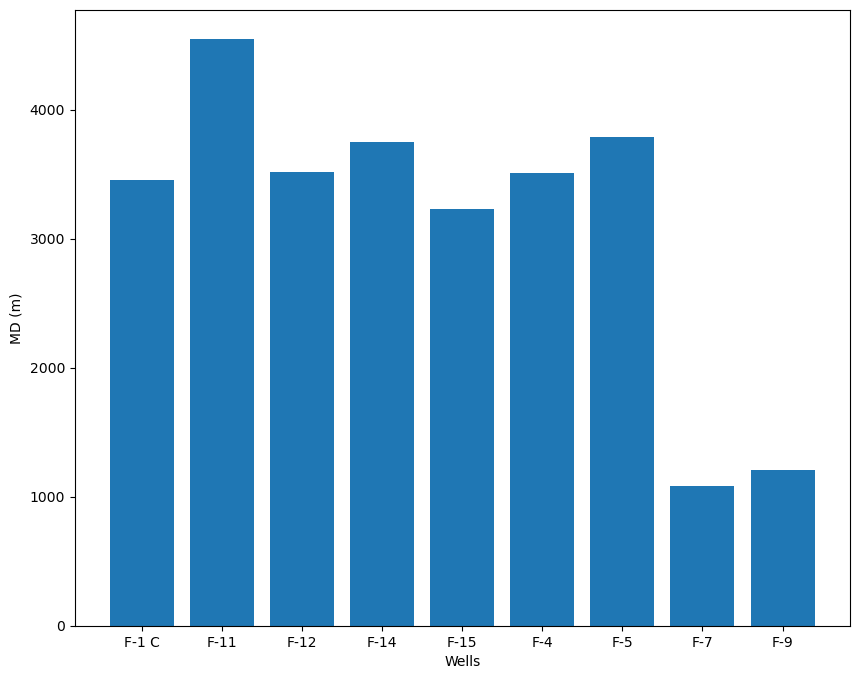

In [61]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(x=df_group["Well"], height=df_group["md"])

ax.set_xlabel("Wells")
ax.set_ylabel("MD (m)")

plt.show()

# Convert to negative all TVD Values

In [62]:
df_all_wells['neg_tvd'] = df_all_wells['tvd']*-1

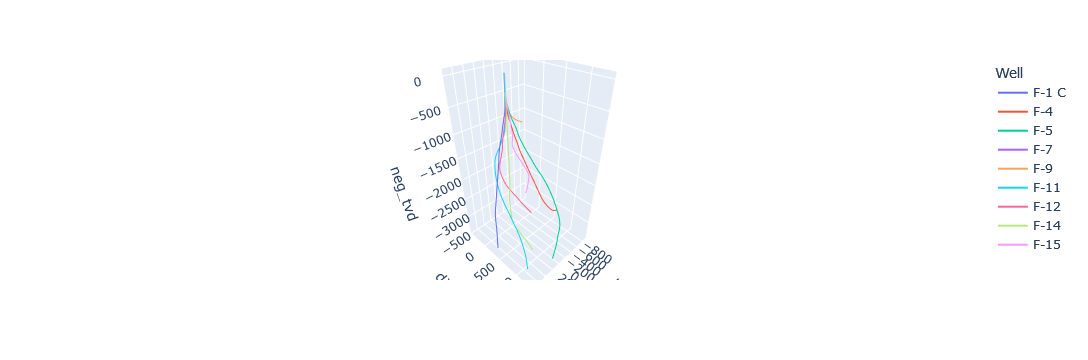

In [65]:
fig = px.line_3d(df_all_wells, 'dispns', 'dispew', 'neg_tvd', color="Well")
fig.show()

# Plot well F-14

In [66]:
df_all_wells[df_all_wells['Well']=='F-14']

,azi,incl,md,tvd,dispns,dispew,Well,neg_tvd
687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,F-14,-0.000000
688,0.000000,0.000000,145.899994,145.899994,0.000000,0.000000,F-14,-145.899994
689,0.094597,0.003142,155.089996,155.089981,0.014371,0.001364,F-14,-155.089981
690,0.659385,0.005760,195.440002,195.439595,0.169310,0.078538,F-14,-195.439595
691,1.016131,0.010647,235.800003,235.798224,0.374322,0.332376,F-14,-235.798224
...,...,...,...,...,...,...,...,...
776,1.641482,0.849103,3638.070068,3086.326121,319.865900,891.305938,F-14,-3086.326121
777,1.634501,0.867254,3678.389893,3112.687602,317.818312,921.744721,F-14,-3112.687602
778,1.637119,0.875632,3718.840088,3138.726257,315.807109,952.634067,F-14,-3138.726257
779,1.636072,0.877202,3729.860107,3145.778062,315.250306,961.084086,F-14,-3145.778062


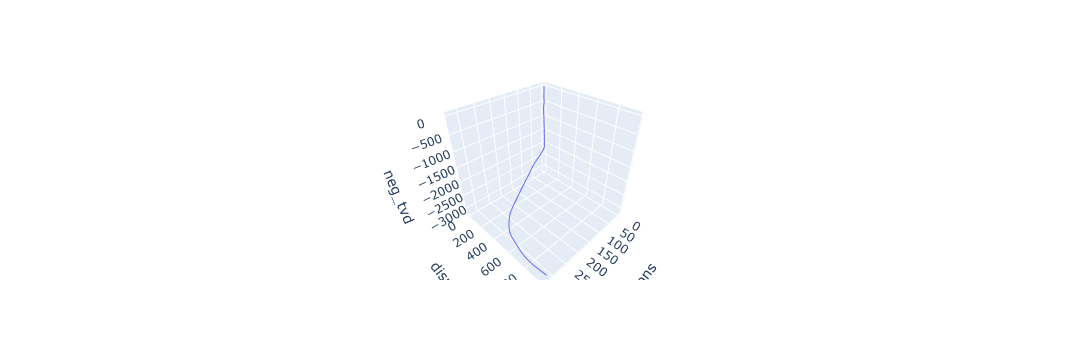

In [68]:
fig_14 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-14'], 'dispns', 'dispew', 'neg_tvd')
fig_14.show()

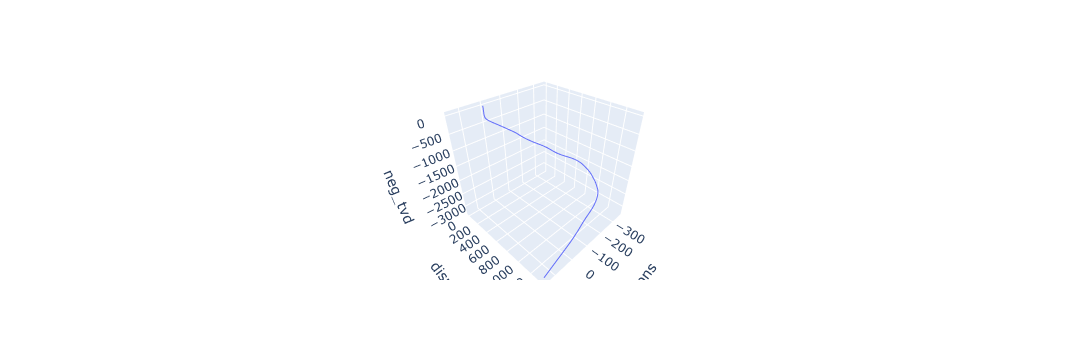

In [69]:
fig_5 = px.line_3d(df_all_wells[df_all_wells['Well']=='F-5'], 'dispns', 'dispew', 'neg_tvd')
fig_5.show()

# Output

Conver xml files to csv files

In [73]:
wells = ['F-1 C',
        'F-4',
        'F-5',
        'F-7',
        'F-9',
        'F-11',
        'F-12',
        'F-14',
        'F-15']

preffix = "Data/output/"
suffix = ".csv"

for well in wells:
    df = df_all_wells[df_all_wells['Well']==well]
    df.to_csv(preffix + well + suffix, index=False)

# EDA (EXploratory Data Analysis)

In [75]:
df_all_wells

,azi,incl,md,tvd,dispns,dispew,Well,neg_tvd
0,0.000000,0.000000,0.000000,0.000000,3.170000,-3.530000,F-1 C,-0.000000
1,0.000000,0.000000,210.699997,210.699997,3.170000,-3.530000,F-1 C,-210.699997
2,5.275083,0.032114,237.600006,237.595383,3.400403,-3.895308,F-1 C,-237.595383
3,5.318018,0.033336,251.100006,251.088156,3.644096,-4.263587,F-1 C,-251.088156
4,5.336519,0.043110,264.899994,264.878010,3.948795,-4.693964,F-1 C,-264.878010
...,...,...,...,...,...,...,...,...
856,4.469265,0.382925,3118.280029,2938.419040,-699.230295,-217.451880,F-15,-2938.419040
857,4.471534,0.390081,3158.540039,2975.709107,-702.866857,-232.185777,F-15,-2975.709107
858,4.470487,0.371232,3199.020020,3013.291014,-706.461696,-246.789120,F-15,-3013.291014
859,4.460363,0.366170,3211.780029,3025.193506,-707.585751,-251.248326,F-15,-3025.193506


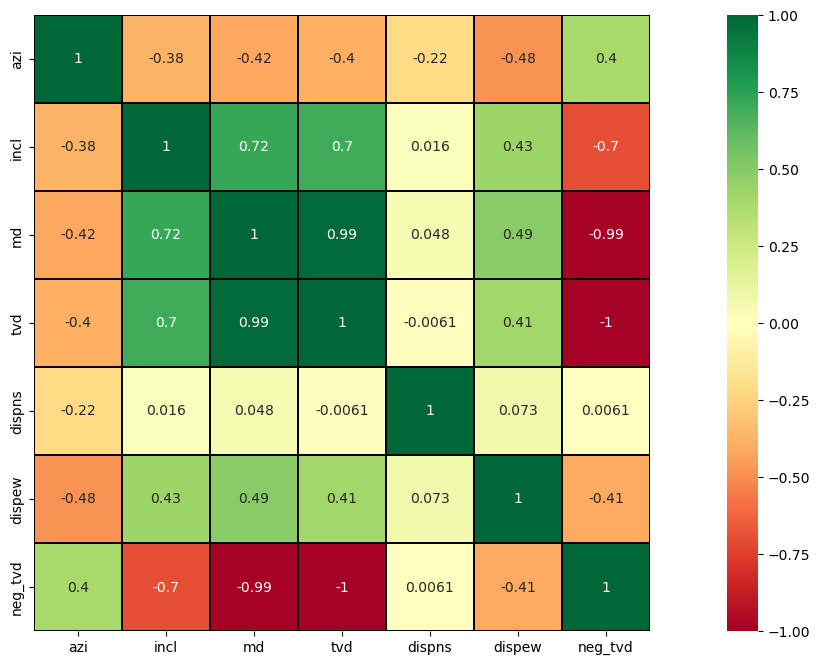

In [76]:
corr = df_all_wells[["azi", "incl", "md", "tvd", "dispns", "dispew", "neg_tvd"]].corr()

fig, ax1 = plt.subplots(figsize=(20,8))
sns.heatmap(data=corr, cmap='RdYlGn', annot=True, linewidths=0.01, linecolor='black', square=True, ax=ax1)
plt.show()

## Plots for Categorical Variables

<AxesSubplot:xlabel='Well', ylabel='md'>

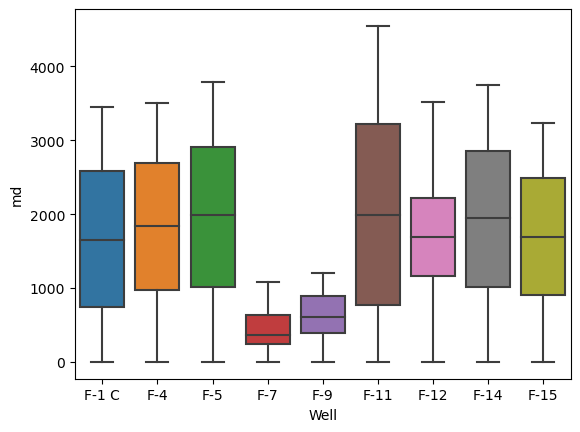

In [77]:
sns.boxplot(data=df_all_wells, x='Well', y='md')

<AxesSubplot:xlabel='Well', ylabel='tvd'>

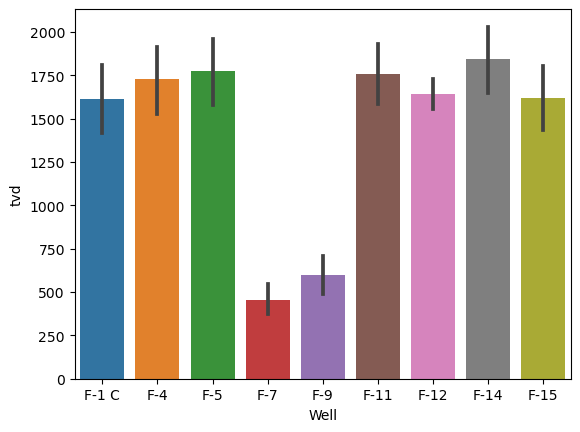

In [78]:
sns.barplot(data=df_all_wells, x='Well', y='tvd')

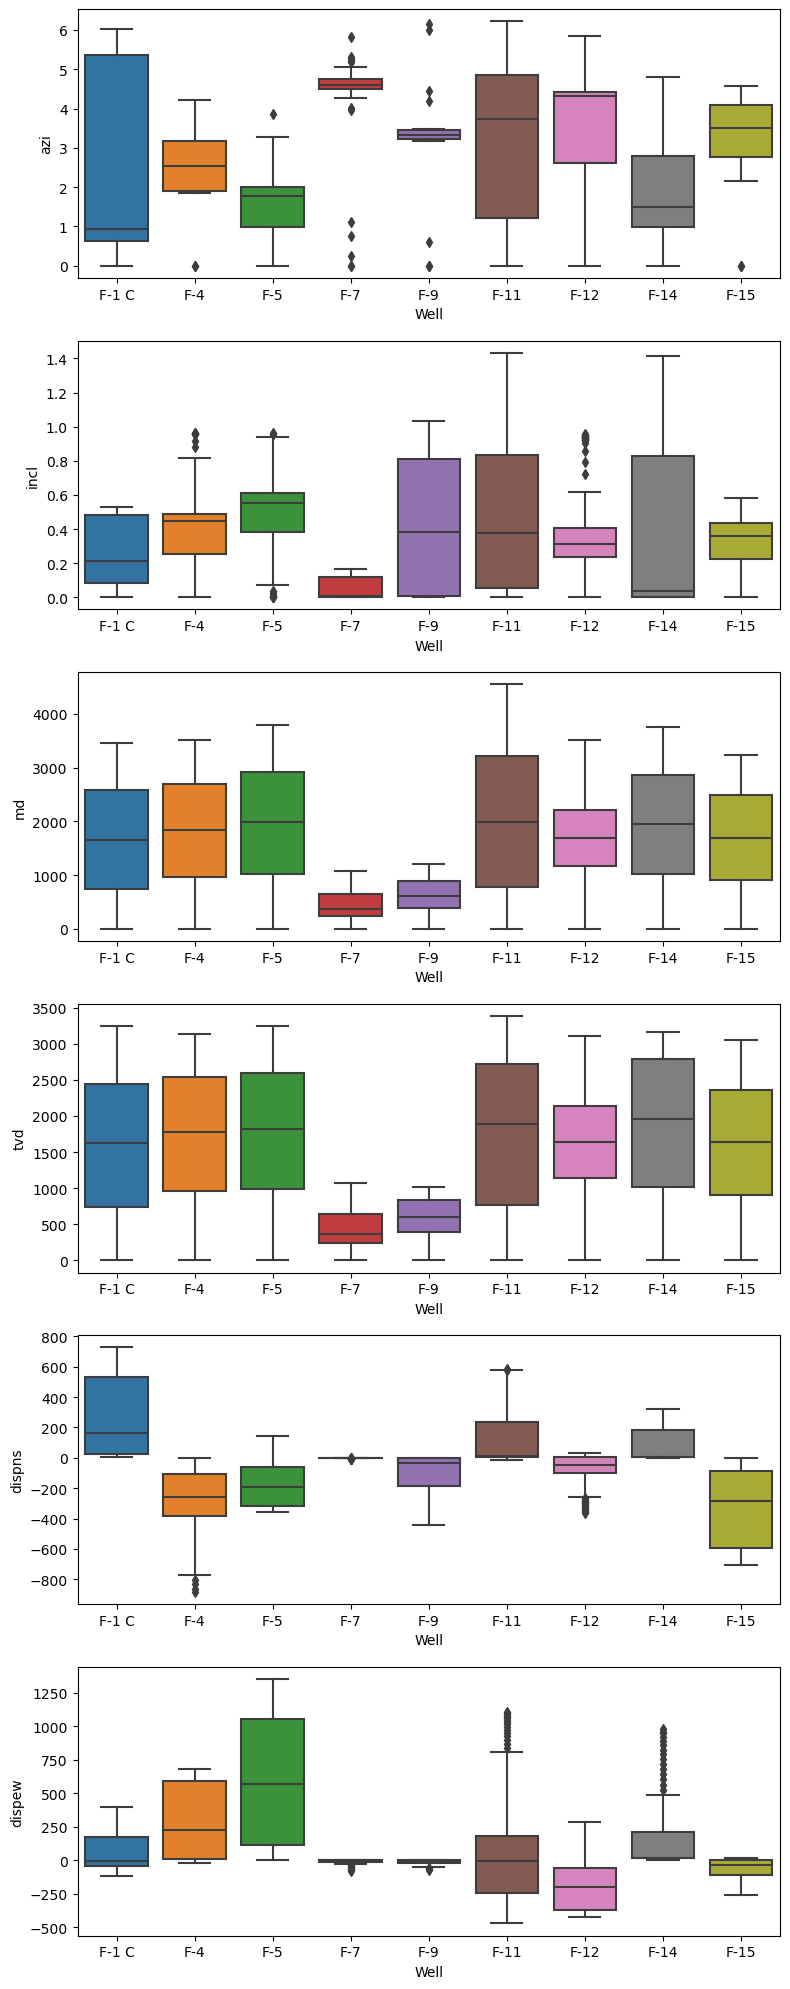

In [79]:
columns = ['azi', 'incl', 'md', 'tvd', 'dispns', 'dispew']
fig, ax = plt.subplots(len(columns), 1, figsize=(8,20))

for col, axes in zip(columns, ax):
    sns.boxplot(data=df_all_wells, x='Well', y=col, ax=axes)
    plt.tight_layout()

## Plots for Numeric Variables

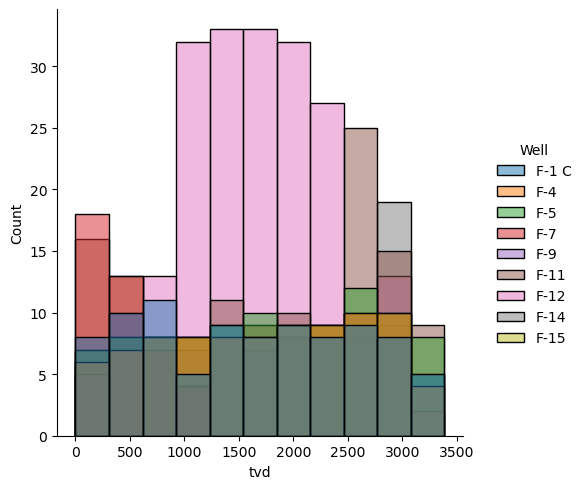

In [25]:
sns.displot(data=df_all_wells, x='tvd', hue='Well')